## Introduction to scikit-learn


In [1]:
## complete scikit learn workflow
#1. get the data ready
import numpy as np
import pandas as pd
heart_diseases = pd.read_csv("heart-disease.csv")
heart_diseases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
## create x (feature matrix)
x = heart_diseases.drop("target", axis=1)
## create y (labels)
y = heart_diseases["target"]

In [3]:
##2. choosing the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## keeping the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
##3. fit the model to training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [5]:
##4. make a prediction

In [6]:
y_predict = clf.predict(x_test)

In [7]:
clf.score(x_train, y_train)

1.0

In [8]:
clf.score(x_test, y_test)

0.8688524590163934

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [10]:
confusion_matrix(y_test, y_predict)

array([[22,  5],
       [ 3, 31]])

In [11]:
accuracy_score(y_test, y_predict)

0.8688524590163934

In [12]:
##5. improving the model
## try different amount n_estimators
np.random.seed(20)
for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    clf =RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set:{clf.score(x_test, y_test) * 100:.2f}%")
    print("")

trying model with 10 estimators
Model accuracy on test set:81.97%

trying model with 20 estimators
Model accuracy on test set:83.61%

trying model with 30 estimators
Model accuracy on test set:86.89%

trying model with 40 estimators
Model accuracy on test set:83.61%

trying model with 50 estimators
Model accuracy on test set:83.61%

trying model with 60 estimators
Model accuracy on test set:86.89%

trying model with 70 estimators
Model accuracy on test set:81.97%

trying model with 80 estimators
Model accuracy on test set:86.89%

trying model with 90 estimators
Model accuracy on test set:85.25%



In [13]:
##6. save model and load it
import pickle
pickle.dump(clf, open("../scikit_learn/random_forest_model1.pkl", "wb"))

In [14]:
load_model = pickle.load(open("../scikit_learn/random_forest_model1.pkl", "rb"))
load_model.score(x_test, y_test)

0.8524590163934426

## Step by step

In [15]:
## standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 get the data ready to use for machine learning
Three main things we have to do
1. split the data into features and labels
2. filling (alos called imputing) or disregarding missing values
3. converting non-numerical values (also called feature encoding)

In [16]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x = heart_diseases.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_diseases["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
## spit the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [21]:
x.shape

(303, 13)

In [22]:
## as test_size is 0.2 
## 0.8 means 80% of data will be used for training
## so, 303 * 0.8 equals 242 and rest 61 as test which is shown above

## 1.1  All data should be numerical

In [23]:
car_sales = pd.read_csv("../scikit_learn/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,BMW,Black,16974,5,"$22,400.00"
1,Toyota,Blue,23409,3,"$5,100.00"
2,Toyota,White,145433,4,"$5,700.00"
3,Nissan,White,33564,4,"$8,600.00"
4,Nissan,White,32884,4,"$11,600.00"


In [24]:
len(car_sales), car_sales.dtypes

(1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price            object
 dtype: object)

In [25]:
car_sales["Price"] = car_sales["Price"].str.replace(r'[\$,.]', '', regex=True).str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,BMW,Black,16974,5,22400
1,Toyota,Blue,23409,3,5100
2,Toyota,White,145433,4,5700
3,Nissan,White,33564,4,8600
4,Nissan,White,32884,4,11600
...,...,...,...,...,...
995,Toyota,Blue,29063,3,8700
996,Toyota,White,52708,4,6200
997,Honda,Blue,56432,4,8000
998,Nissan,White,31124,4,11500


In [26]:
car_sales.to_csv("../scikit_learn/car-sales-extended.csv", index = False)

In [27]:
car_sale = pd.read_csv("../scikit_learn/car-sales-extended.csv")
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,BMW,Black,16974,5,22400
1,Toyota,Blue,23409,3,5100
2,Toyota,White,145433,4,5700
3,Nissan,White,33564,4,8600
4,Nissan,White,32884,4,11600
...,...,...,...,...,...
995,Toyota,Blue,29063,3,8700
996,Toyota,White,52708,4,6200
997,Honda,Blue,56432,4,8000
998,Nissan,White,31124,4,11500


In [28]:
## split into feature matrix, labels
x =  car_sale.drop("Price", axis=1)
y = car_sale["Price"]

## spliting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
## build a meachine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'BMW'

In [30]:
## converting data into numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(x)
transformed_x


array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.69740e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.34090e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.45433e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 5.64320e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.11240e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.24400e+04]], shape=(1000, 13))

In [31]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16974.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23409.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,145433.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33564.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,29063.0
996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52708.0
997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,56432.0
998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31124.0


In [32]:
## let's refit the data in model
x_train, x_test, y_train, y_test =train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9069546185657307

## for missing data
* new version of oneHotEncoder handle the missing data
* for practice

In [33]:
car_sales_missing = pd.read_csv("../scikit_learn/car-sales-missing.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,NaN,Black,11179.0,5.0,"$22,000"
1,Honda,NaN,NaN,4.0,"$7,500"
2,NaN,NaN,NaN,4.0,"$7,500"
3,Honda,Red,87899.0,4.0,NaN
4,Nissan,White,213095.0,4.0,"$3,500"
...,...,...,...,...,...
495,NaN,White,213095.0,4.0,"$3,500"
496,NaN,White,31600.0,4.0,"$9,700"
497,NaN,Black,11179.0,5.0,"$22,000"
498,Honda,NaN,NaN,4.0,"$7,500"


In [38]:
## two option 
#* either remove it
#* or fill it

In [39]:
car_sales_missing.isna().sum()  ## provide number of data missing


Make        100
Colour       92
Odometer    220
Doors        99
Price       146
dtype: int64

In [40]:
car_sales_missing.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

## option1. fill missing column with pandas

In [41]:
import pandas as pd

car_sales_missing["Odometer"] = pd.to_numeric(car_sales_missing["Odometer"], errors="coerce")
car_sales_missing["Doors"] = pd.to_numeric(car_sales_missing["Doors"], errors="coerce")

car_sales_missing = car_sales_missing.fillna({
    "Make": "missing",
    "Colour": "missing",
    "Odometer": car_sales_missing["Odometer"].mean(),
    "Doors": 4
})


In [42]:
car_sales_missing.isna().sum()

Make          0
Colour        0
Odometer      0
Doors         0
Price       146
dtype: int64

In [43]:
## removing rows with missing price
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [45]:
len(car_sales_missing)

354

In [46]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,missing,Black,11179.000000,5.0,"$22,000"
1,Honda,missing,90697.935714,4.0,"$7,500"
2,missing,missing,90697.935714,4.0,"$7,500"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,missing,White,90697.935714,4.0,"$9,700"
...,...,...,...,...,...
494,BMW,missing,11179.000000,5.0,"$22,000"
495,missing,White,213095.000000,4.0,"$3,500"
496,missing,White,31600.000000,4.0,"$9,700"
497,missing,Black,11179.000000,5.0,"$22,000"


In [47]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace(r'[\$,.]', '', regex=True).astype(int)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,missing,Black,11179.000000,5.0,22000
1,Honda,missing,90697.935714,4.0,7500
2,missing,missing,90697.935714,4.0,7500
4,Nissan,White,213095.000000,4.0,3500
5,missing,White,90697.935714,4.0,9700
...,...,...,...,...,...
494,BMW,missing,11179.000000,5.0,22000
495,missing,White,213095.000000,4.0,3500
496,missing,White,31600.000000,4.0,9700
497,missing,Black,11179.000000,5.0,22000


In [48]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [49]:
## converting data into numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.11790000e+04, 2.20000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.06979357e+04, 7.50000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.06979357e+04, 7.50000000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.16000000e+04, 9.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.11790000e+04, 2.20000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.06979357e+04, 7.50000000e+03]], shape=(354, 16))

In [50]:
x_train, x_test, y_train, y_test =train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9996063267409321

## Option2. filling data with sklearn

In [51]:
car_sales_missing = pd.read_csv("../scikit_learn/car-sales-missing.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,NaN,Black,11179.0,5.0,"$22,000"
1,Honda,NaN,NaN,4.0,"$7,500"
2,NaN,NaN,NaN,4.0,"$7,500"
3,Honda,Red,87899.0,4.0,NaN
4,Nissan,White,213095.0,4.0,"$3,500"
...,...,...,...,...,...
495,NaN,White,213095.0,4.0,"$3,500"
496,NaN,White,31600.0,4.0,"$9,700"
497,NaN,Black,11179.0,5.0,"$22,000"
498,Honda,NaN,NaN,4.0,"$7,500"


In [52]:
car_sales_missing.isna().sum(), car_sales_missing.dtypes

(Make        100
 Colour       92
 Odometer    220
 Doors        99
 Price       146
 dtype: int64,
 Make         object
 Colour       object
 Odometer    float64
 Doors       float64
 Price        object
 dtype: object)

In [53]:
## drop rows with no price value (label)
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing, car_sales_missing.isna().sum()

(       Make Colour  Odometer  Doors    Price
 0       NaN  Black   11179.0    5.0  $22,000
 1     Honda    NaN       NaN    4.0   $7,500
 2       NaN    NaN       NaN    4.0   $7,500
 4    Nissan  White  213095.0    4.0   $3,500
 5       NaN  White       NaN    4.0   $9,700
 ..      ...    ...       ...    ...      ...
 494     BMW    NaN   11179.0    5.0  $22,000
 495     NaN  White  213095.0    4.0   $3,500
 496     NaN  White   31600.0    4.0   $9,700
 497     NaN  Black   11179.0    5.0  $22,000
 498   Honda    NaN       NaN    4.0   $7,500
 
 [354 rows x 5 columns],
 Make         77
 Colour       73
 Odometer    146
 Doors        38
 Price         0
 dtype: int64)

In [54]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace(r'[\$,.]', '', regex=True).astype(int)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,NaN,Black,11179.0,5.0,22000
1,Honda,NaN,NaN,4.0,7500
2,NaN,NaN,NaN,4.0,7500
4,Nissan,White,213095.0,4.0,3500
5,NaN,White,NaN,4.0,9700
...,...,...,...,...,...
494,BMW,NaN,11179.0,5.0,22000
495,NaN,White,213095.0,4.0,3500
496,NaN,White,31600.0,4.0,9700
497,NaN,Black,11179.0,5.0,22000


In [55]:
## spliting into x  and y
x =  car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [56]:
## fill missing value with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## fill categorical value
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer =  SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

## defining colums
cat_column = ["Make", "Colour"]
door_column = ["Doors"]
num_column = ["Odometer"]

## creating imputer to fill in the missing value
imputer = ColumnTransformer([
    ("cat_column", cat_imputer, cat_column),
    ("door_column", door_imputer, door_column),
    ("num_column", num_imputer, num_column)
    ])

## transforming data
filled_x = imputer.fit_transform(x)
filled_x

array([['missing', 'Black', 5.0, 11179.0],
       ['Honda', 'missing', 4.0, 97065.53846153847],
       ['missing', 'missing', 4.0, 97065.53846153847],
       ...,
       ['missing', 'White', 4.0, 31600.0],
       ['missing', 'Black', 5.0, 11179.0],
       ['Honda', 'missing', 4.0, 97065.53846153847]],
      shape=(354, 4), dtype=object)

In [57]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Odometer", "Doors"])
car_sales_filled

,Make,Colour,Odometer,Doors
0,missing,Black,5.0,11179.0
1,Honda,missing,4.0,97065.538462
2,missing,missing,4.0,97065.538462
3,Nissan,White,4.0,213095.0
4,missing,White,4.0,97065.538462
...,...,...,...,...
349,BMW,missing,5.0,11179.0
350,missing,White,4.0,213095.0
351,missing,White,4.0,31600.0
352,missing,Black,5.0,11179.0


In [58]:
## converting data into numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1416 stored elements and shape (354, 18)>

In [59]:
## fitting the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9977395185015253

## 2. Choosing the right estimator/ algorithm for the problem
* Classification problem - predicting a category
* Regression problem - predicting a number 

## 2.1 picking a machine learning model for a regression problem
using  california housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing

In [60]:

## Get California Housing DataSet
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [61]:
housing_df = pd.DataFrame(housing["data"],
                         columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
## adding housing value as target to the dataframe
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
## import algorthm/ estimators
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

## setting random seed
np.random.seed(42)

## creating data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

## split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

## Instantiate and fit the model
model = Ridge()
model.fit(x_train, y_train)

## checking the score of the model
model.score(x_test, y_test)

0.5758549611440126

In [64]:
## improve the mode with RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = housing_df.drop("target", axis=1)
y = housing_df["target"]
from sklearn.model_selection import train_test_split
model = RandomForestRegressor()
## split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

## for saving the model
## import pickle
## pickle.dump(model, open("../scikit_learn/california_housing_ML.pkl", "wb"))


0.8059809073051385

In [65]:
## reloading the model
## california_ML = pickle.load(open("../scikit_learn/california_housing_ML.pkl", "rb"))
## california_ML.score(x_test, y_test)

In [66]:
## working on another regression problem
## fetcing diabtetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [67]:
diabetes_df = pd.DataFrame(diabetes["data"],
                          columns=diabetes["feature_names"])
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [68]:
## adding target column
diabetes_df["target"] = diabetes["target"]
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

x = diabetes_df.drop("target", axis=1)
y = diabetes_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)
model = SVR()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.17189160839111395

In [70]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

x = diabetes_df.drop("target", axis=1)
y = diabetes_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)
model = HistGradientBoostingRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.27134031074803333

## 2.2 Machine learning model for classification problem


In [71]:
## fetching dataset
heart_diseases = pd.read_csv("../scikit_learn/heart-disease.csv")
heart_diseases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [72]:
len(heart_diseases)

303

In [73]:
##  import linear svc
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

## geeting data ready
x = heart_diseases.drop("target", axis=1)
y =  heart_diseases["target"]

## spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size=0.2)

## fitting data
model = LinearSVC()
model.fit(x_train, y_train)

## Evaluate the LinearSVC
model.score(x_test, y_test)

0.8688524590163934

In [74]:
## improving the model through experimentation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

## geeting data ready
x = heart_diseases.drop("target", axis=1)
y =  heart_diseases["target"]

## spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size=0.2)

## fitting data
model = RandomForestClassifier()
model.fit(x_train, y_train)

## Evaluate the RandomForestClassifier
model.score(x_test, y_test)

0.8524590163934426

## 3. Fitting a model on Data

## 3.1 fitting the model to data
* Different name for :
* x = features, features variable, data
* y = labels, target variables

## 3.2 making prediction with ML model
2 ways to make predictions:
* 1. predict()
  2. predict_proba()

In [75]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_diseases.drop("target", axis=1)
y =  heart_diseases["target"]
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8524590163934426

In [77]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [78]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [79]:
## comparing prediction to the truth labels to evaluate the model
y_preds =  model.predict(x_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [80]:
model.score(x_test, y_test)

0.8524590163934426

In [81]:
##  checking accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [82]:
## make prediction with predict_probo()
## predict_probo() returns probabilities fo classsifiaction label
model.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [83]:
model.predict(x_test[:5])

array([0, 1, 1, 0, 1])

## predict can also be used for regression problem

In [84]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = housing_df.drop("target", axis=1)
y = housing_df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8059809073051385

In [86]:
y_pred = model.predict(x_test)
y_pred

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ], shape=(4128,))

In [87]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ],
      shape=(4128,))

In [88]:
## compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

np.float64(0.3270458119670544)

## 4. Evaluating a ML model
Three ways to evaluate sklearn model
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric function

## 4.2 use scoring

In [89]:
heart_diseases
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier().fit(x_train, y_train)
model.score(x_test, y_test)

0.8524590163934426

In [90]:
cross_val_score(model, x, y, cv=5) ## cv will group data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [91]:
score = model.score(x_test, y_test)
scoring = np.mean(cross_val_score(model, x, y, cv=5))
## camparing score and scoring
score, scoring

(0.8524590163934426, np.float64(0.8183606557377049))

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [92]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1. Accuracy

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_diseases.drop("target", axis=1)
y = heart_diseases["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier().fit(x_train, y_train)
cross_val_score = cross_val_score(model, x, y, cv=5)
cross_val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [94]:
print(f"Heart Disease classifier cross_validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease classifier cross_validated Accuracy: 81.16%


## 2. Area under ROC curve
Roc curves are a comparision of a model's true positive rate(tpr) versus a model's false positive rate(fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train, y_train)

from sklearn.metrics import roc_curve
y_probs = model.predict_proba(x_test)
y_probs[:10]

array([[0.38, 0.62],
       [0.03, 0.97],
       [0.92, 0.08],
       [0.4 , 0.6 ],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.76, 0.24],
       [0.59, 0.41],
       [0.5 , 0.5 ]])

In [96]:
y_prob_positive = y_probs[:,1]
y_prob_positive

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96, 0.89,
       0.18, 0.99, 0.12, 0.47, 0.98, 0.4 , 0.16, 0.3 , 0.77, 0.93, 0.65,
       0.09, 0.02, 0.98, 0.6 , 0.58, 0.09, 0.77, 0.96, 0.99, 0.01, 0.64,
       0.71, 0.85, 0.46, 0.55, 0.37, 0.99, 0.78, 0.08, 0.26, 0.16, 0.68,
       0.58, 0.9 , 0.34, 0.44, 0.46, 0.53, 0.35, 0.4 , 0.92, 0.86, 0.91,
       0.9 , 0.18, 0.66, 0.19, 0.02, 0.99])

In [97]:
## calculate fpr, tpr, thresholds
fpr, tpr, thresholds  = roc_curve(y_test, y_prob_positive)
fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
       0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
       0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
       1.        ])

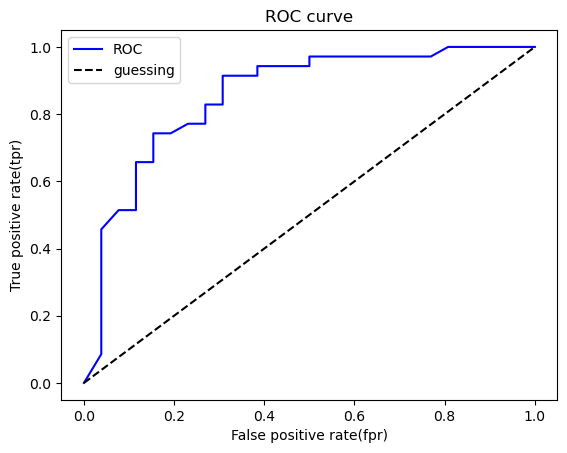

In [98]:
## create a function for plotting roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # plot roc cuve
    plt.plot(fpr,tpr, color="blue", label="ROC")

    # plot guessing
    plt.plot([0,1],[0,1], color="black", linestyle="--", label="guessing")

    # customize
    plt.title("ROC curve")
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_prob_positive)
roc_auc_score

np.float64(0.8554945054945055)

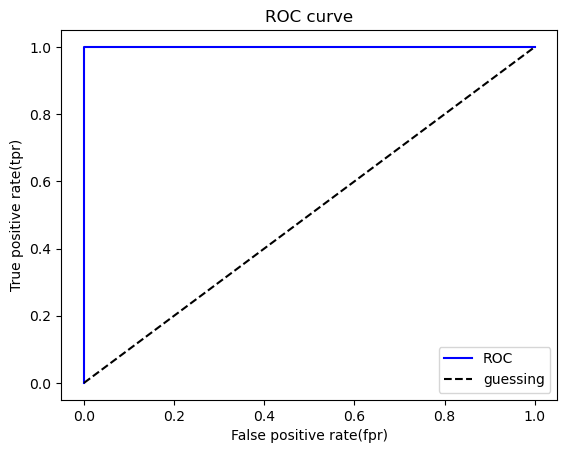

In [100]:
# plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [101]:
## perfect AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test)

np.float64(1.0)

## 3. Confusion matrix
 is a quick way to compare the label a model predicts and the actual labels it was supposed to predict. in essence, giving you an idea where the model is getting condused

In [116]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 5, 27]])

In [117]:
## visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_pred,
           rownames=["Actual lebel"],
           colnames=["rpedicted label"]
           )


rpedicted label,0,1
Actual lebel,,
0,24,5
1,5,27


In [118]:
len(y_pred), 19+7+6+29

(61, 61)

In [119]:
## installing seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



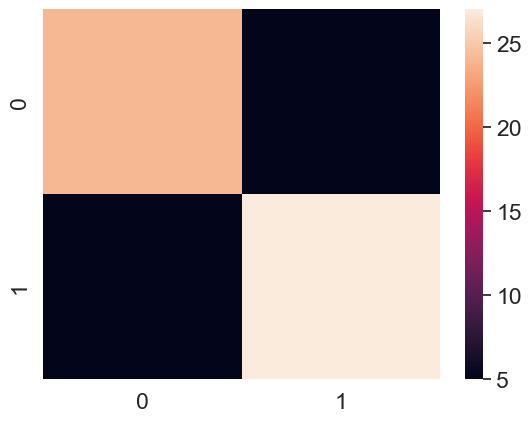

In [120]:
## using seaborn's heatmap to make it more visual
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# plot using seaborn
sns.heatmap(conf_mat)
plt.show()

## 3.1 confusion matrix display

In [123]:
import sklearn
sklearn.__version__

'1.5.2'

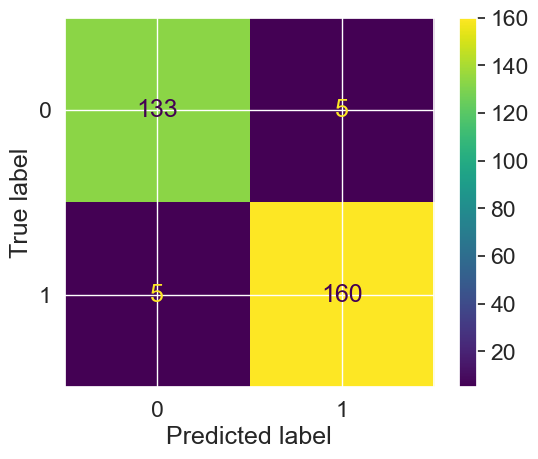

In [130]:
## useing from_estimator
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x, y)
plt.show()

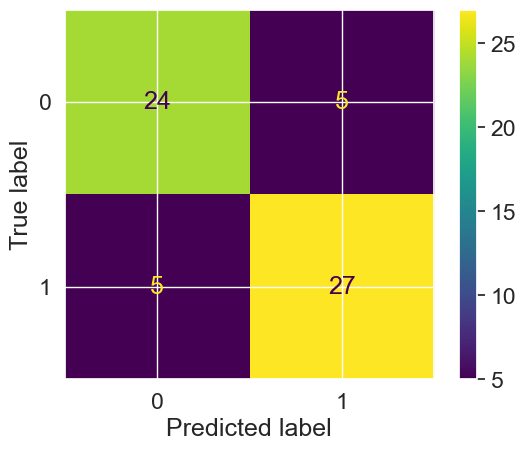

In [134]:
## using from_prediction
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## 4. Classification report

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [138]:
## where  precision nad recall become valuable
diseases_true = np.zeros(10000)
diseases_true[0] = 1 ## only one positive case

diseases_pred = np.zeros(10000)  ## model predicted every case as 0
pd.DataFrame(classification_report(diseases_true, diseases_pred, output_dict=True))


/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
